### 1. Import Lib

In [1]:
# Import the required libraries
import utilities as util
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')


### 2. Visualize some samples

Visualizing sample audio files...


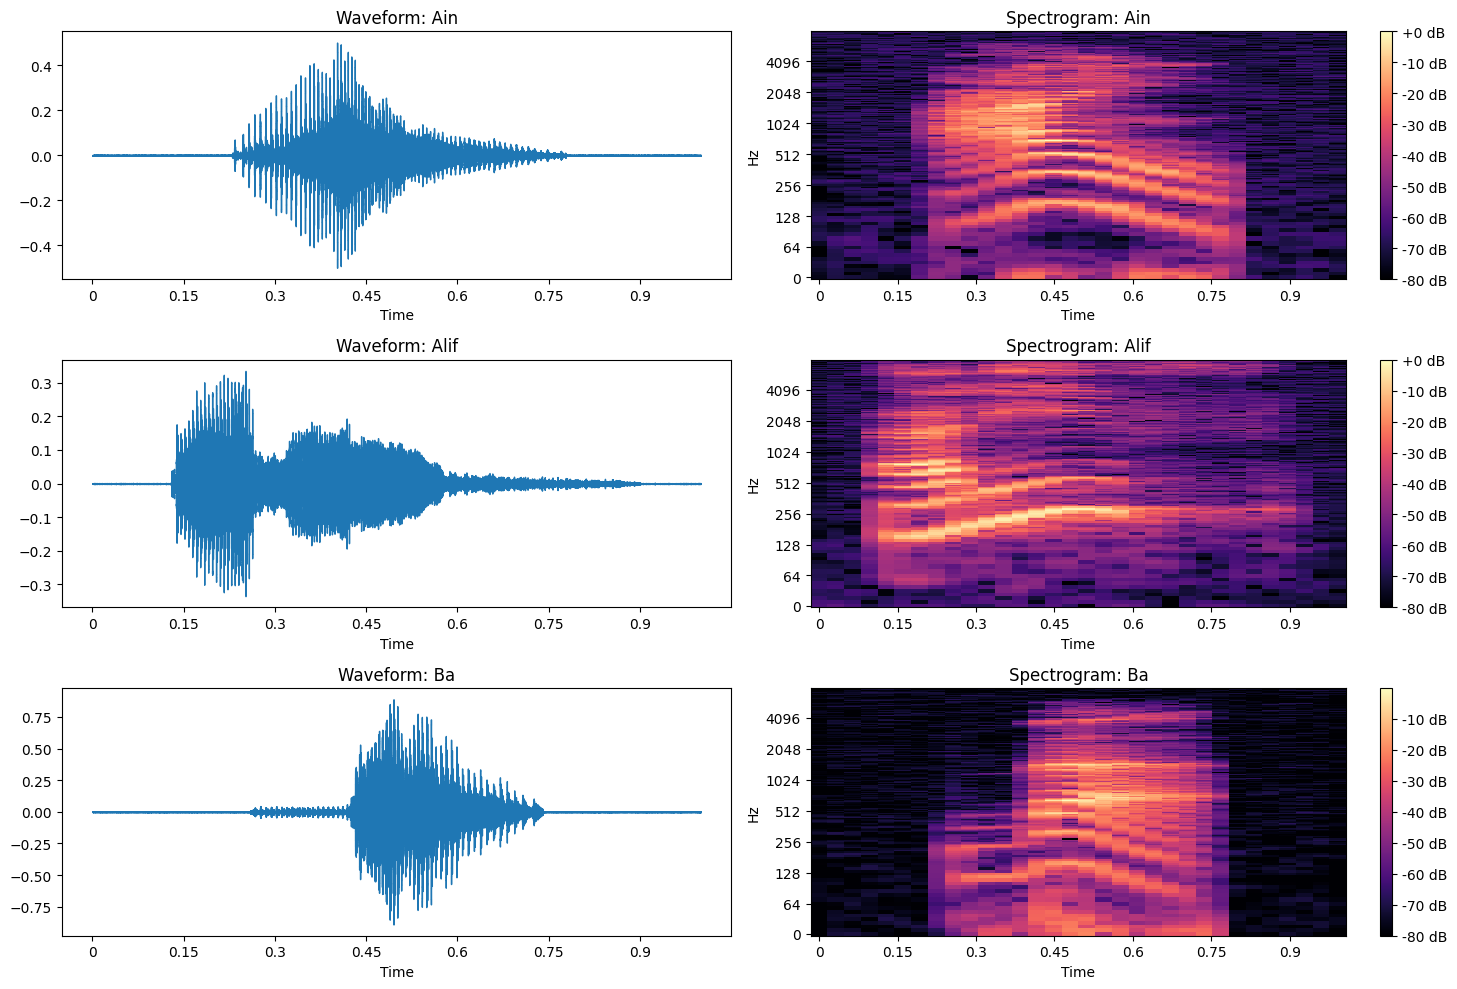

In [2]:
# Set the path to your dataset directory
dataset_directory = '../Cleaned Audio Dataset'  # Replace with your dataset path

# Visualize sample audios
print("Visualizing sample audio files...")
util.visualize_sample_audios(dataset_directory)

### 3. Load the dataset:
- Extract features from the audio file 
- Add label for each audio file

In [3]:
# Load the dataset
X, y = util.load_dataset(dataset_directory)

# Print dataset statistics
print(f"Dataset loaded: {X.shape[0]} samples with {X.shape[1]} features each")
print(f"Classes: {np.unique(y)}")

Loading and processing audio files...
Processing folder: Ain
Processing folder: Alif
Processed 100/1435 files...
Processing folder: Ba
Processing folder: Dad
Processed 200/1435 files...
Processing folder: Dal
Processing folder: Fa
Processed 300/1435 files...
Processing folder: Ghain
Processing folder: Ha
Processed 400/1435 files...
Processing folder: Ha2
Processing folder: Jeem
Processed 500/1435 files...
Processing folder: Kaf
Processing folder: Kha
Processed 600/1435 files...
Processing folder: Lam
Processing folder: Meem
Processed 700/1435 files...
Processing folder: Noon
Processing folder: Qaf
Processing folder: Ra
Processed 800/1435 files...
Processing folder: Sad
Processing folder: Seen
Processed 900/1435 files...
Processing folder: Sheen
Processing folder: Ta
Processed 1000/1435 files...
Processing folder: Taa
Processing folder: Thaa
Processed 1100/1435 files...
Processing folder: Thal
Processed 1200/1435 files...
Processing folder: Waw
Processing folder: Ya
Processed 1300/1435 

### 4. Encoding the target classes and split data into train and test

In [4]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 1004 samples
Testing set: 431 samples


### 5. Build and train the model
- Build a pipline with:
  - StandardScaler (zscore)
  - Kernalized SVC with rbf

In [174]:
# Create a pipeline with scaling and SVM best param (C=100, gamma=0.0003) = 0.63
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=100, gamma=0.0003, probability=True, class_weight='balanced'))
])

# Train the model
print("Training the SVM model...")
pipeline.fit(X_train, y_train)

Training the SVM model...


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=100, class_weight='balanced', gamma=0.0003,
                     probability=True))])

### 6. Evaluate the model on train data


In [175]:
# Evaluate the model
print("Evaluating the model...")
y_pred_train = pipeline.predict(X_train)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train, target_names=label_encoder.classes_))

Evaluating the model...

Classification Report:
              precision    recall  f1-score   support

         Ain       1.00      1.00      1.00        35
        Alif       1.00      1.00      1.00        55
          Ba       1.00      1.00      1.00        39
         Dad       1.00      1.00      1.00        29
         Dal       0.88      0.97      0.92        30
          Fa       0.97      1.00      0.99        36
       Ghain       1.00      1.00      1.00        27
          Ha       1.00      1.00      1.00        36
         Ha2       1.00      1.00      1.00        41
        Jeem       1.00      1.00      1.00        34
         Kaf       0.97      1.00      0.99        36
         Kha       1.00      1.00      1.00        34
         Lam       1.00      1.00      1.00        33
        Meem       1.00      1.00      1.00        24
        Noon       1.00      1.00      1.00        32
         Qaf       1.00      1.00      1.00        34
          Ra       1.00      1.00

### 7. Evaluate the model on the test data


In [180]:
# Evaluate the model
print("Evaluating the model...")
y_pred_test = pipeline.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

Evaluating the model...

Classification Report:
              precision    recall  f1-score   support

         Ain       0.75      1.00      0.86        15
        Alif       1.00      0.91      0.95        23
          Ba       0.53      0.59      0.56        17
         Dad       0.62      0.62      0.62        13
         Dal       0.54      0.54      0.54        13
          Fa       0.60      0.56      0.58        16
       Ghain       0.90      0.82      0.86        11
          Ha       0.67      0.62      0.65        16
         Ha2       0.36      0.44      0.40        18
        Jeem       0.82      0.93      0.88        15
         Kaf       0.62      0.67      0.65        15
         Kha       0.92      0.79      0.85        14
         Lam       0.62      0.57      0.59        14
        Meem       0.79      1.00      0.88        11
        Noon       1.00      0.71      0.83        14
         Qaf       0.90      0.60      0.72        15
          Ra       0.73      0.69

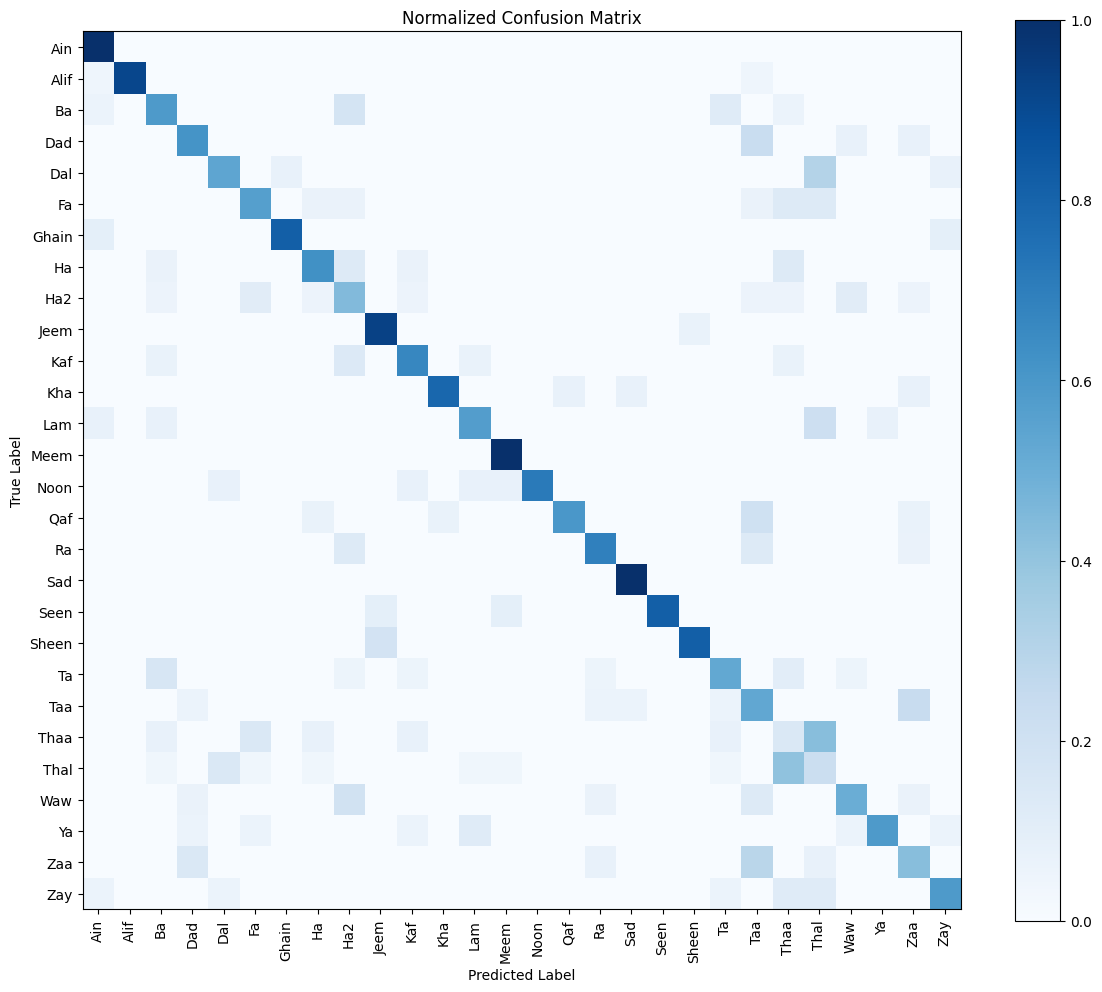

In [178]:
# Plot confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_test)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=90)
plt.yticks(tick_marks, label_encoder.classes_)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

#### We notice that there are severe **`overfitting`**, to solve this problem we should: 
- **Get more Data** if available or **doing augmentation**.
- Use more complex classifiers like **Random Forest**.

### 8. Save the Model and Label Encoder to use them later

In [181]:
# Save the model
joblib.dump(pipeline, 'arabic_letter_audio_classifier.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("Model saved as 'arabic_letter_audio_classifier.pkl'")
print("Encoder saved as 'label_encoder.pkl'")

Model saved as 'arabic_letter_audio_classifier.pkl'
Encoder saved as 'label_encoder.pkl'


### 9. build `predict_audio` function to use the model later for new data

In [182]:
# Test on a new file (example)
def predict_letter(file_path):
    # Load the trained pipeline and label encoder
    pipeline = joblib.load('arabic_letter_audio_classifier.pkl')
    label_encoder = joblib.load('label_encoder.pkl')
    features = util.extract_features_v2(file_path)
    if features is not None:
        features = features.reshape(1, -1)
        prediction = pipeline.predict(features)
        probabilities = pipeline.predict_proba(features)
        max_prob = np.max(probabilities)
        predicted_class = label_encoder.inverse_transform(prediction)[0]
        print(f"Predicted letter: ({predicted_class}) with confidence: {max_prob:.2f}")
        return predicted_class, max_prob
    else:
        print("Could not extract features from the audio file.")
        return None, 0

In [186]:
# Example usage
print("\nExample prediction (replace with an actual test file):")
pred = predict_letter("../Cleaned Audio Dataset\\Alif\\0_Alif_4.wav")


Example prediction (replace with an actual test file):
Predicted letter: (Alif) with confidence: 0.79
